## Lee información de archivo CSV

In [1]:
import pandas as pd
import matplotlib as plt
import seaborn as sns
import os
from plotly import __version__
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import cufflinks as cf
init_notebook_mode(connected=True)
cf.go_offline()
%matplotlib inline
pd.set_option('display.max_columns', None)

In [2]:
df = pd.read_csv("crautos.csv")

### Limpieza de datos

In [3]:
df.rename(columns = {'Combustible:':'combustible','Cilindrada:':'cilindrada','Transmisión:':'transmision','Estilo:':'estilo','Color Exterior:':'colorExt'},inplace=True)
df.rename(columns = {'Color Interior:':'colorInt','Placa:':'placa','Provincia:':'provincia'},inplace=True)
#df.drop('descripcion',axis=1,inplace=True)

In [4]:
# Elimina registros sin precio valido
df=df[df.precio>0]
df=df[df.preciodolar>0]
df.shape

(10580, 14)

### Visualizacion de Datos

In [5]:
dft=df.groupby(['year']).marca.count()
dft.iplot(kind='bar',title='Distribucion por año')

In [6]:
dft=df.groupby(['estilo']).estilo.count()
dft=dft.to_frame(name='cantidad')
dft.reset_index().iplot(kind='pie',labels='estilo',values='cantidad')

In [7]:
dft=df.groupby(['transmision']).estilo.count()
dft=dft.to_frame(name='cantidad')
dft.reset_index().iplot(kind='pie',labels='transmision',values='cantidad')

In [8]:
dft=df.groupby(['marca']).estilo.count()
dft=dft.to_frame(name='cantidad')
dft.sort_values(by='cantidad',ascending=False).head(20).iplot(kind='bar',title='20 marcas más populares')


In [9]:
import plotly.express as px
fig = px.scatter(df, x="year", y="precio", color="estilo", hover_data=['marca','modelo'],title='Antigüedad/Precio',marginal_x="histogram",marginal_y='histogram') 
fig.show()


In [10]:
dft=df.groupby(['marca','year']).precio.mean()
dft=dft.to_frame(name='cantidad')

In [11]:
dft

cantidad
marca      year              
Acura      2013  1.205940e+07
Alfa Romeo 2002  3.600000e+06
           2007  5.600000e+06
           2013  8.900000e+06
           2015  9.000000e+06
...                       ...
Volvo      2020  2.485000e+07
           2021  2.872667e+07
           2022  3.458000e+07
           2023  4.335800e+07
Zap        2013  3.900000e+06

[960 rows x 1 columns]

In [12]:
dft=df.groupby(['marca','modelo']).estilo.count()
dft=dft.to_frame(name='cantidad')
dft.sort_values(by='cantidad',ascending=False).head(20).iplot(kind='bar',title='20 modelos más populares')

In [13]:
df.dtypes

year            int64
marca          object
modelo         object
pasajeros       int64
precio          int64
preciodolar     int64
combustible    object
cilindrada     object
transmision    object
estilo         object
colorExt       object
colorInt       object
placa          object
provincia      object
dtype: object

C:\Users\wrodriguez\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning:

The figure layout has changed to tight



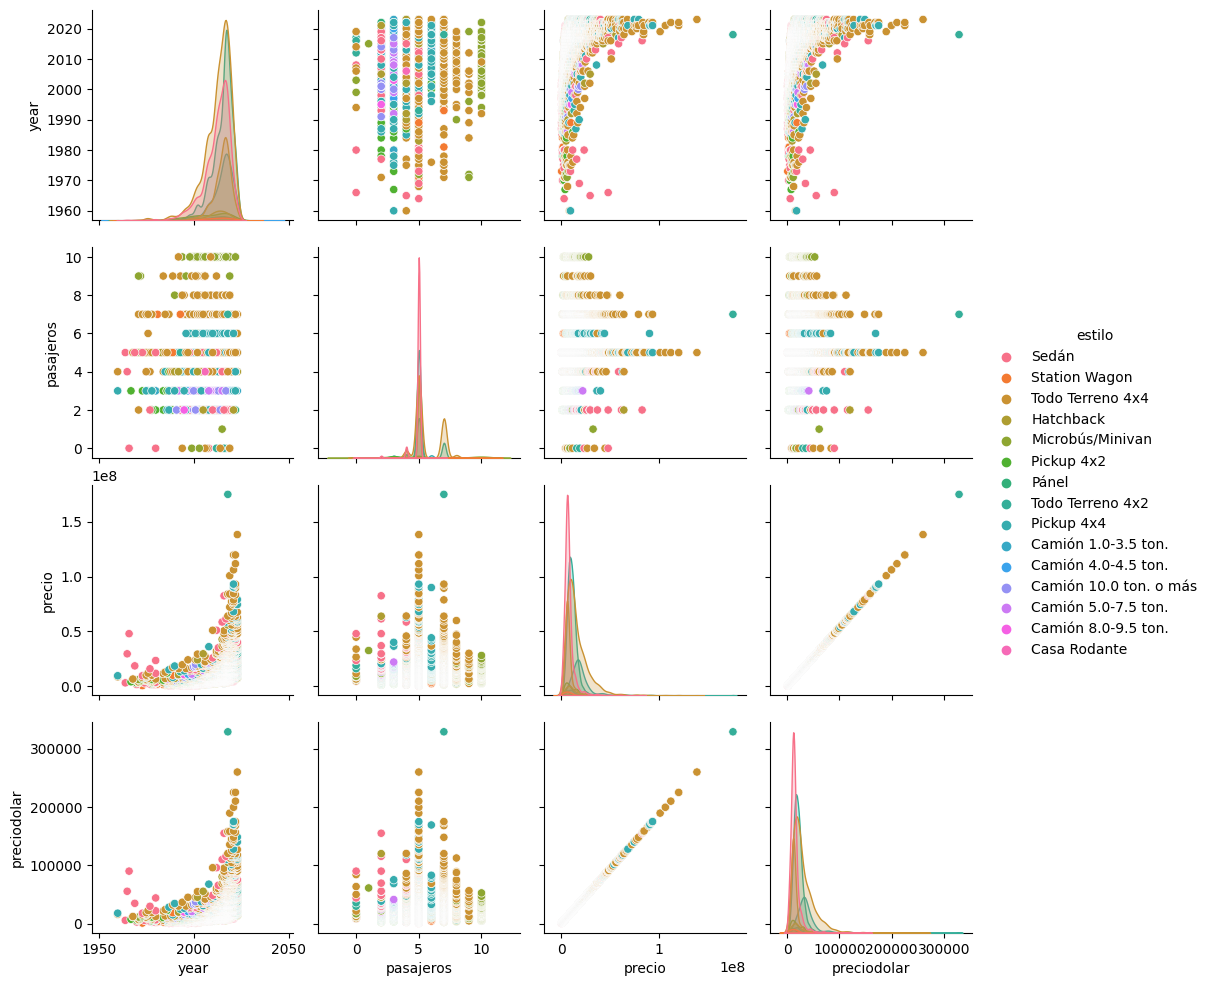

In [14]:
sns.pairplot(df,hue='estilo')

In [ ]:
df=df[df.modelo.str.len()<30]

In [ ]:
df.to_csv("crautos.csv",index=False)


In [ ]:
pos=nombre.split().index('Combustible:')
#pos=nombre.index('Pas.')  
pos 

In [ ]:
nombre.split()[0:pos+1]

In [ ]:
df.precio.corr

In [ ]:
df.columns

In [ ]:
df[['year','precio','pasajeros']].corr()

In [ ]:
sns.scatterplot(x=df.year,y=df.precio,hue=df.estilo,edgecolor=None,alpha=.2,palette='RdYlGn')#,legend=False)

In [ ]:
for e in df.estilo.unique():  
    dfe.iplot(kind='scatter',y='precio',x='year',mode='markers',title=e)

In [ ]:
df[df.estilo=='Sedán'].count()